In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns

In [2]:
df = pd.read_csv("Part4 - batting_bowling_ipl_bat.csv")
df.shape

(180, 7)

In [10]:
df.head(20)

,Name,Runs,Ave,SR,Fours,Sixes,HF
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,CH Gayle,733.0,61.08,160.74,46.0,59.0,9.0
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,G Gambhir,590.0,36.87,143.55,64.0,17.0,6.0
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,V Sehwag,495.0,33.00,161.23,57.0,19.0,5.0
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,CL White,479.0,43.54,149.68,41.0,20.0,5.0
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,S Dhawan,569.0,40.64,129.61,58.0,18.0,5.0


In [9]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Runs,90.0,219.933333,156.253669,2.00,98.000,196.500,330.7500,733.00
Ave,90.0,24.729889,13.619215,0.50,14.665,24.440,32.1950,81.33
SR,90.0,119.164111,23.656547,18.18,108.745,120.135,131.9975,164.10
Fours,90.0,19.788889,16.399845,0.00,6.250,16.000,28.0000,73.00
Sixes,90.0,7.577778,8.001373,0.00,3.000,6.000,10.0000,59.00
HF,90.0,1.188889,1.688656,0.00,0.000,0.500,2.0000,9.00


So, the dataset is such that every legitimate row of data is followed by a NaN row. Let's drop the NaN rows from the dataframe.

In [13]:
df = df.dropna()
df.shape

(90, 7)

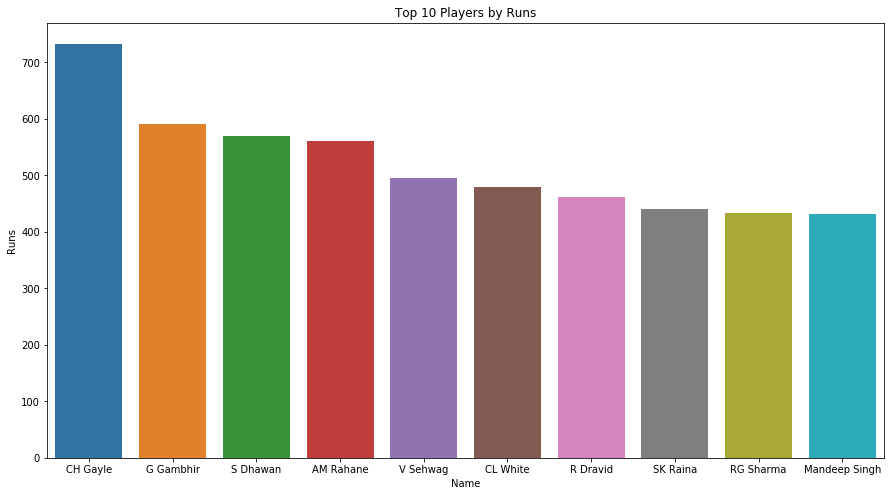

In [17]:
plt.figure(figsize=(15,8))
b1=df.groupby('Name')['Runs'].sum().sort_values(ascending = False ).head(10)
b1= b1.reset_index() 
b1.columns = ['Name' ,'Runs']
sns.barplot(data= b1 , x= 'Name' , y ='Runs');
plt.title("Top 10 Players by Runs");

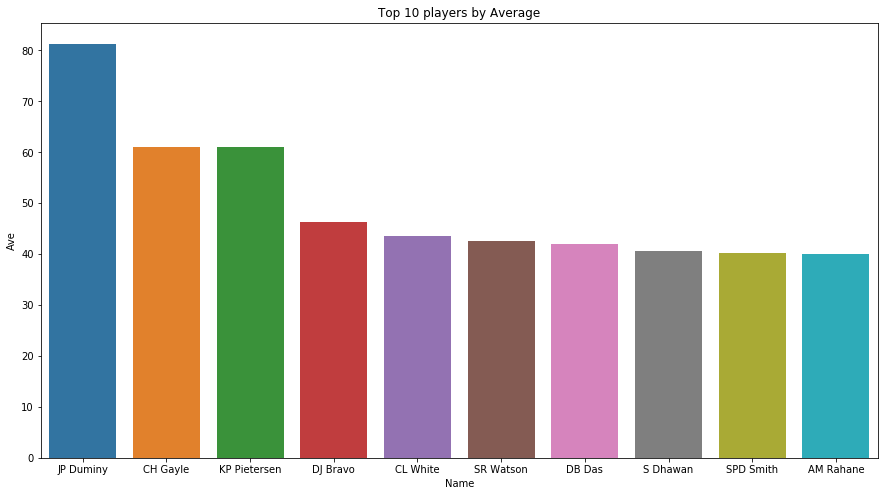

In [18]:
plt.figure(figsize=(15,8))
b1=df.groupby('Name')['Ave'].sum().sort_values(ascending = False ).head(10)
b1= b1.reset_index() 
b1.columns = ['Name' ,'Ave']
sns.barplot(data= b1 , x= 'Name' , y ='Ave')
plt.title("Top 10 players by Average");

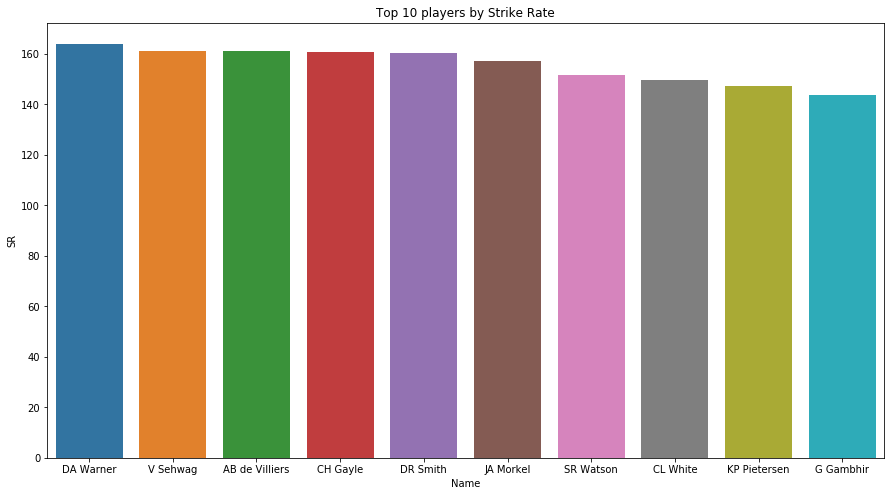

In [19]:
plt.figure(figsize=(15,8))
b1=df.groupby('Name')['SR'].sum().sort_values(ascending = False ).head(10)
b1= b1.reset_index() 
b1.columns = ['Name' ,'SR']
sns.barplot(data= b1 , x= 'Name' , y ='SR')
plt.title("Top 10 players by Strike Rate");

In other formats of cricket (like ODI or Test), we wouldn't consider number of 4s and 6s as true indicators of batsmanship, but in IPL (T20 in general) these are very important.

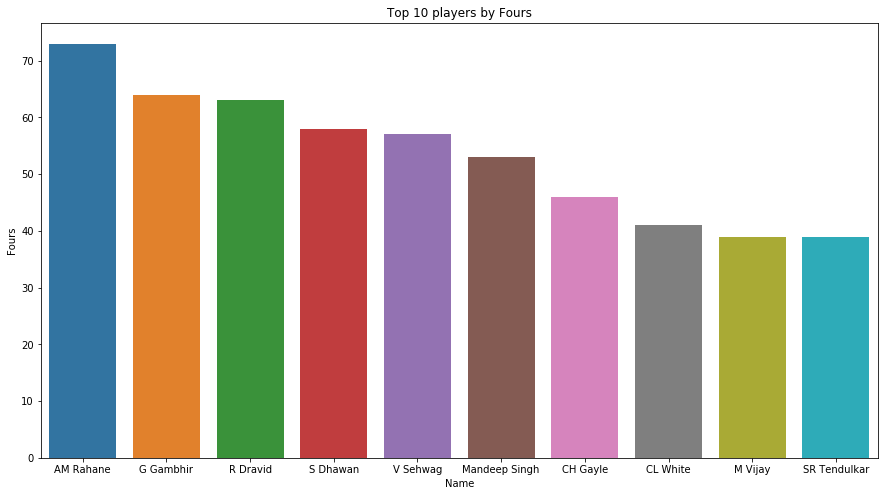

In [20]:
plt.figure(figsize=(15,8))
b1=df.groupby('Name')['Fours'].sum().sort_values(ascending = False ).head(10)
b1= b1.reset_index() 
b1.columns = ['Name' ,'Fours']
sns.barplot(data= b1 , x= 'Name' , y ='Fours')
plt.title("Top 10 players by Fours");

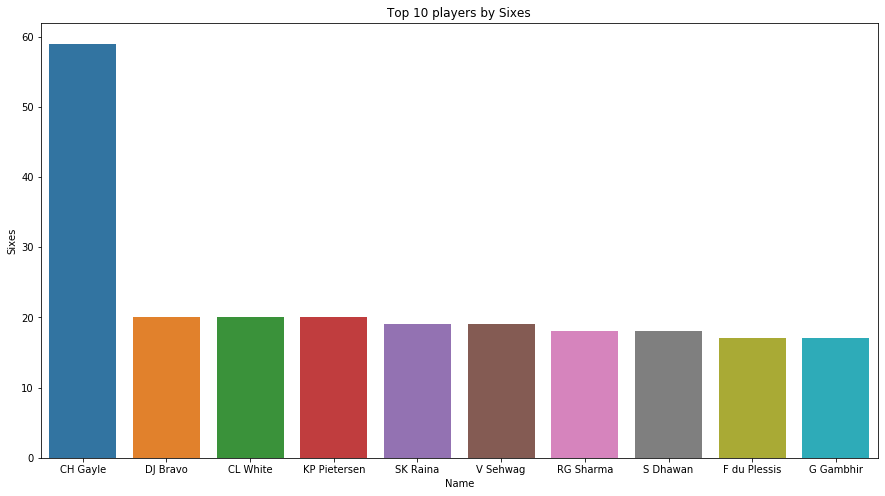

In [21]:
plt.figure(figsize=(15,8))
b1=df.groupby('Name')['Sixes'].sum().sort_values(ascending = False ).head(10)
b1= b1.reset_index() 
b1.columns = ['Name' ,'Sixes']
sns.barplot(data= b1 , x= 'Name' , y ='Sixes')
plt.title("Top 10 players by Sixes");

Chris Gayle is miles apart than others when it comes to hitting sixes!

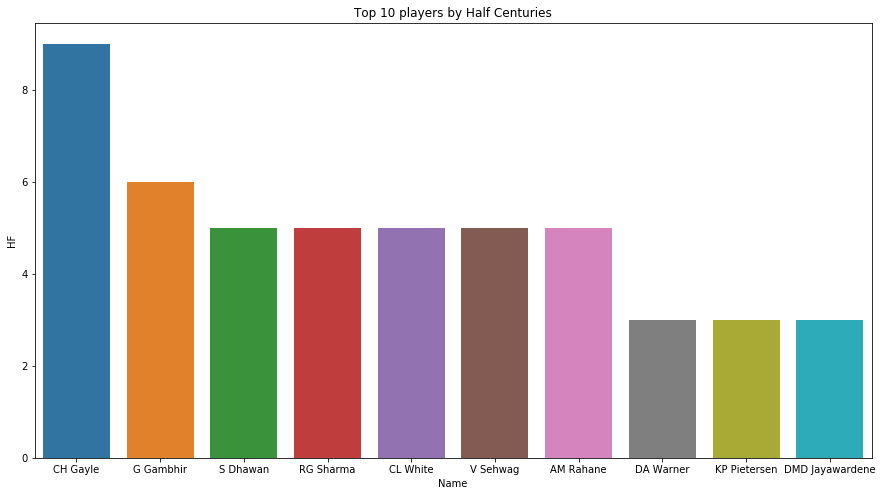

In [22]:
plt.figure(figsize=(15,8))
b1=df.groupby('Name')['HF'].sum().sort_values(ascending = False ).head(10)
b1= b1.reset_index() 
b1.columns = ['Name' ,'HF']
sns.barplot(data= b1 , x= 'Name' , y ='HF')
plt.title("Top 10 players by Half Centuries");

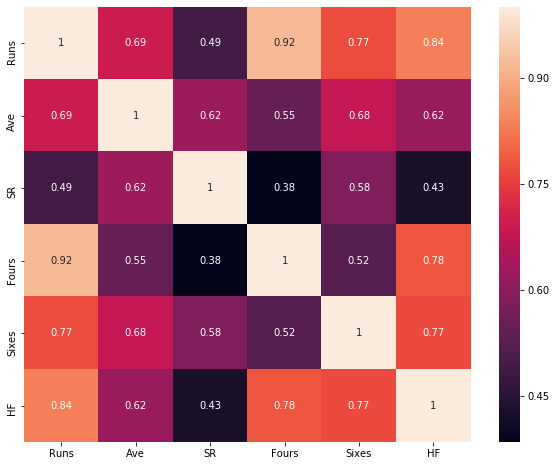

In [23]:
#checking for correlation
plt.figure(figsize=(10,8))
corr=df.drop(columns='Name').corr()
sns.heatmap(corr,annot=True);

<b>Insights</b>: 
- High correlation of Runs with Fours, Sixes & Half centuries
- Strike Rate & Average look to be the most independent variables.

In [30]:
#scaling the numeric variables
from scipy.stats import zscore
cc = df.iloc[:,1:7] 
cc.head()
cc1 = cc.apply(zscore)
cc1.head()

,Runs,Ave,SR,Fours,Sixes,HF
1,3.301945,2.683984,1.767325,1.607207,6.462679,4.651551
3,2.381639,0.896390,1.036605,2.710928,1.184173,2.865038
5,1.770248,0.610640,1.788154,2.281703,1.435530,2.269533
7,1.667276,1.388883,1.297182,1.300618,1.561209,2.269533
9,2.246490,1.174755,0.444038,2.343021,1.309851,2.269533


As we know, scaling is done to remove the skewness which various different units bring into the equation, when we re trying to identify clusters in an unlabelled data

In [25]:
df.head()

,Name,Runs,Ave,SR,Fours,Sixes,HF
1,CH Gayle,733.0,61.08,160.74,46.0,59.0,9.0
3,G Gambhir,590.0,36.87,143.55,64.0,17.0,6.0
5,V Sehwag,495.0,33.00,161.23,57.0,19.0,5.0
7,CL White,479.0,43.54,149.68,41.0,20.0,5.0
9,S Dhawan,569.0,40.64,129.61,58.0,18.0,5.0


In [31]:
#checking for the within sum of squares
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
wss =[] 
for i in range(1,6):
    KM = KMeans(n_clusters=i)
    KM.fit(cc1)
    wss.append(KM.inertia_)
wss

[540.0,
 296.26135354732025,
 223.36518460916955,
 178.1750796759041,
 148.52653974259806]

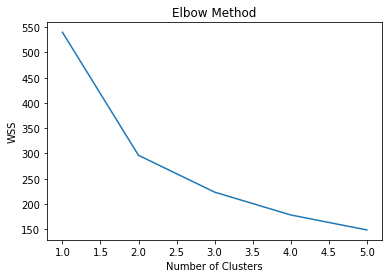

In [32]:
#plotting to check for optimal clustres 
plt.plot(range(1,6), wss);
plt.title('Elbow Method');
plt.xlabel("Number of Clusters")
plt.ylabel("WSS");

Let's go with 2 clusters as the drop in Inertia is significant

In [34]:
#using 2 centroids
k_means = KMeans(n_clusters = 2)
k_means.fit(cc1)
labels = k_means.labels_

In [35]:
# Calculating silhouette_score
silhouette_score(cc1,labels)

0.41111085574076756

In [36]:
#plotting silhouette score for different centroids
kmeans_kwargs = {
   "init": "random",
   "n_init": 10,
   "max_iter": 300,
   "random_state": 42,
}


silhouette_coefficients = []

 # Notice you start at 2 clusters for silhouette coefficient
for k in range(2, 6):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(cc1)
    score = silhouette_score(cc1,kmeans.labels_)
    silhouette_coefficients.append(score)

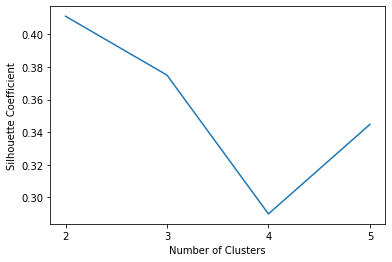

In [37]:
plt.plot(range(2,6), silhouette_coefficients)
plt.xticks(range(2, 6))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()

The highest silhoutte coefficient is realized with 2 clusters. Hence, it is safe to assume that this entire dataset can be partitioned into 2 clusters.

In [38]:
#attaching the labels to the original data
df['cluster']=labels
df.head()

,Name,Runs,Ave,SR,Fours,Sixes,HF,cluster
1,CH Gayle,733.0,61.08,160.74,46.0,59.0,9.0,1
3,G Gambhir,590.0,36.87,143.55,64.0,17.0,6.0,1
5,V Sehwag,495.0,33.00,161.23,57.0,19.0,5.0,1
7,CL White,479.0,43.54,149.68,41.0,20.0,5.0,1
9,S Dhawan,569.0,40.64,129.61,58.0,18.0,5.0,1


In [40]:
#veiwing the distribution of the clusters
df.cluster.value_counts().sort_index()

0    55
1    35
Name: cluster, dtype: int64

In [42]:
#based on the above table renaming/ranking the playes in Grade A and Grade B
df['cluster'] = df['cluster'].replace({1: 'Grade A', 0: 'Grade B'})

In [44]:
#list of Grade A players
Grade_A = df[df['cluster'] == 'Grade A']
Grade_A.head(10)

,Name,Runs,Ave,SR,Fours,Sixes,HF,cluster
1,CH Gayle,733.0,61.08,160.74,46.0,59.0,9.0,Grade A
3,G Gambhir,590.0,36.87,143.55,64.0,17.0,6.0,Grade A
5,V Sehwag,495.0,33.00,161.23,57.0,19.0,5.0,Grade A
7,CL White,479.0,43.54,149.68,41.0,20.0,5.0,Grade A
9,S Dhawan,569.0,40.64,129.61,58.0,18.0,5.0,Grade A
11,AM Rahane,560.0,40.00,129.33,73.0,10.0,5.0,Grade A
13,KP Pietersen,305.0,61.00,147.34,22.0,20.0,3.0,Grade A
15,RG Sharma,433.0,30.92,126.60,39.0,18.0,5.0,Grade A
17,AB de Villiers,319.0,39.87,161.11,26.0,15.0,3.0,Grade A
19,JP Duminy,244.0,81.33,128.42,13.0,11.0,2.0,Grade A


In [46]:
#list of Grade B players
Grade_B = df[df['cluster'] == 'Grade B']
Grade_B.head()

,Name,Runs,Ave,SR,Fours,Sixes,HF,cluster
69,MS Bisla,213.0,30.42,133.12,16.0,10.0,1.0,Grade B
73,BJ Hodge,245.0,30.62,140.00,18.0,9.0,0.0,Grade B
75,NV Ojha,255.0,23.18,113.83,21.0,13.0,1.0,Grade B
77,DB Das,126.0,42.00,135.48,9.0,6.0,0.0,Grade B
79,AC Gilchrist,172.0,34.40,120.27,21.0,4.0,1.0,Grade B


 Hence, we have been able to rate the batsmen into broadly two grades based on the Stats at hand
 
 <b>END</b>